**Image Processing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True) 
test_datagen =ImageDataGenerator(rescale=1)

In [ ]:
x_train = train_datagen.flow_from_directory(r'C:\Dataset\train',target_size = (64,64), batch_size = 32, class_mode ='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Dataset\test',target_size = (64,64), batch_size = 32, class_mode ='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


**Model Training**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'C:\Dataset\train',
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Dataset\test',
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='grayscale',
                                          class_mode='categorical') 

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=512 , activation='relu'))

In [ ]:
model.add(Dense(units=6, activation='softmax')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 


In [ ]:
model.fit_generator(x_train,
                    steps_per_epoch = 594/3 , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = 30/3 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
198/198 [==============================] - 19s 91ms/step - loss: 1.2684 - accuracy: 0.4933 - val_loss: 0.6432 - val_accuracy: 0.7667
Epoch 2/25
198/198 [==============================] - 17s 84ms/step - loss: 0.5539 - accuracy: 0.7997 - val_loss: 0.9102 - val_accuracy: 0.7000
Epoch 3/25
198/198 [==============================] - 19s 97ms/step - loss: 0.3928 - accuracy: 0.8434 - val_loss: 0.3690 - val_accuracy: 0.8333
Epoch 4/25
198/198 [==============================] - 18s 90ms/step - loss: 0.3173 - accuracy: 0.8670 - val_loss: 0.2425 - val_accuracy: 0.9667
Epoch 5/25
198/198 [==============================] - 17s 88ms/step - loss: 0.1971 - accuracy: 0.9226 - val_loss: 0.2907 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 25s 127ms/step - loss: 0.1906 - accuracy: 0.9293 - val_loss: 0.2736 - val_accuracy: 0.9667
Epoch 7/25
198/198 [==============================] - 23s 114ms/step - loss: 0.1494 - accuracy: 0.9461 - val_loss: 0.3782 - val_accurac

In [ ]:
model.save('Gesture.h5')

In [ ]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

**Model** **Testing**

In [ ]:
import numpy as np  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("Gesture.h5")
path = r'C:\Dataset\test\0\2.jpg'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
x_train = train_datagen.flow_from_directory(r'C:\Dataset\train',
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Dataset\test',
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='grayscale',
                                          class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


Populating the interactive namespace from numpy and matplotlib


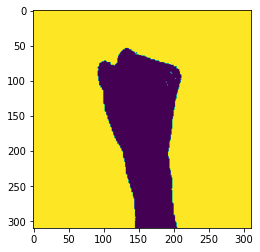

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [ ]:
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 1)

In [ ]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 28ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [ ]:
index=['0','1','2','3','4','5']

In [ ]:
index[np.argmax(pred)]

'0'